In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\fares\Downloads\archive (4)\medical_insurance.csv")
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


## Data Preprocessing

In [3]:
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [5]:
df.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')
Numerical Columns: Index(['person_id', 'age', 'income', 'household_size', 'dependents', 'bmi',
       'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay',
       'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality',
       'risk_score', 'annual_medical_cost', 'annual_premium',
       'monthly_premium', 'claims_count', 'avg_claim_amount',
       'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes',
       'asthma', 'copd', 'cardiovascular_disease', 'cancer_history',
       'kidney_disease', 'liver_disease', 'arthritis', 'mental_health',
       'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count',
       'proc_consult_co

In [7]:
df['alcohol_freq'].value_counts()

alcohol_freq
Occasional    45078
Weekly        19833
Daily          5006
Name: count, dtype: int64

In [8]:
df[df['alcohol_freq'].isnull()].groupby('sex').size()


sex
Female    14771
Male      14701
Other       611
dtype: int64

In [9]:
df['alcohol_freq'].fillna('Unknown', inplace=True)

C:\Users\fares\AppData\Local\Temp\ipykernel_25996\732063846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alcohol_freq'].fillna('Unknown', inplace=True)


In [10]:
df.isnull().sum()

person_id                      0
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_med

In [11]:
df.duplicated().sum()

np.int64(0)

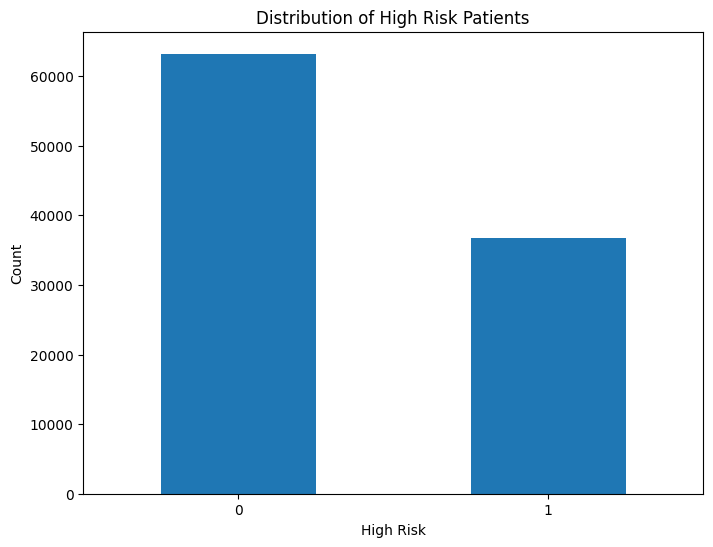

In [23]:
## Data is imbalanced
plt.figure(figsize=(8, 6))
df['is_high_risk'].value_counts().plot(kind='bar')
plt.title('Distribution of High Risk Patients')
plt.xlabel('High Risk')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
corrs = df.corr(numeric_only=True)['is_high_risk'].sort_values(ascending=False)
print(corrs.head(10))


is_high_risk         1.000000
risk_score           0.821276
chronic_count        0.561624
age                  0.559152
systolic_bp          0.442861
diastolic_bp         0.308214
hypertension         0.291361
claims_count         0.265279
visits_last_year     0.265066
total_claims_paid    0.256373
Name: is_high_risk, dtype: float64


## Split the data into train and test

In [13]:
X=df.drop(['is_high_risk','person_id','risk_score'], axis=1)
y=df['is_high_risk']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modelling

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)

# Combine encoded categoricals + original numericals
X_train_final = pd.concat([
    X_train_encoded,
    X_train.drop(columns=categorical_cols)
], axis=1)

In [16]:
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

X_test_final = pd.concat([
    X_test_encoded,
    X_test.drop(columns=categorical_cols)
], axis=1)

In [17]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_resampled == 1)))

Before SMOTE, counts of label '1': 29425
After SMOTE, counts of label '1': 50575


In [18]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,         
    min_samples_split=5,  
    min_samples_leaf=2,   
    random_state=42
)
model.fit(X_train_resampled, y_train_resampled)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = model.predict(X_test_final)

In [20]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     12644
           1       0.93      0.92      0.92      7356

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [21]:
train_accuracy = model.score(X_train_resampled, y_train_resampled)
test_accuracy = model.score(X_test_final, y_test)
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Testing Accuracy: {:.2f}".format(test_accuracy))

Training Accuracy: 0.96
Testing Accuracy: 0.94
